# RGB colorspace

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### Read in an image

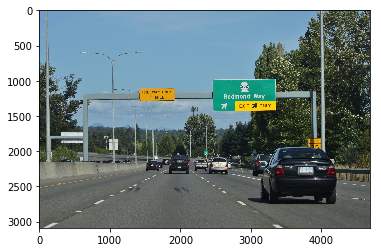

In [12]:
# Read in the image
image = mpimg.imread('images/wa_state_highway.jpg')

plt.imshow(image)

### RGB channels 

Visualize the levels of each color channel. Pay close attention to the traffic signs!

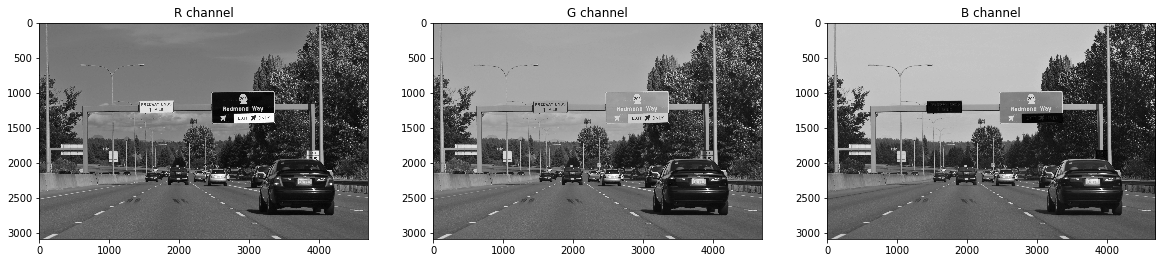

In [13]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## Which area has the lowest value for red? What about for blue?

## Video Filter

In [2]:
import cv2
import numpy as np

### print all the color that the cv2 can convert

In [6]:
color_space = [att for att in dir(cv2) if att.startswith("COLOR_")]
print('Color space:\n',color_space)

Color space:
 ['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrC

In [24]:
cap = cv2.VideoCapture(0)

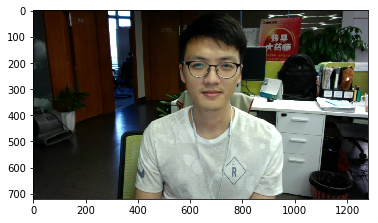

In [25]:
_, state = cap.read()
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [26]:
cap.release()

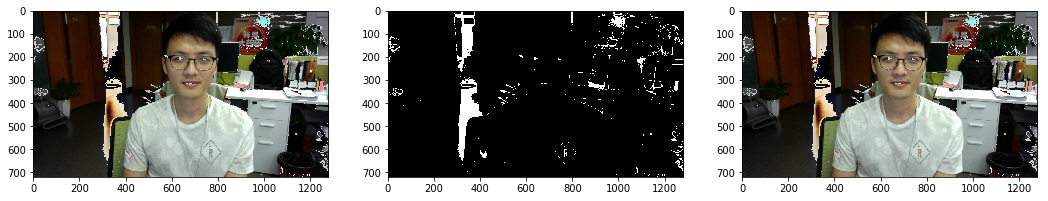

In [27]:
hsv = cv2.cvtColor(state, cv2.COLOR_BGR2HSV)
    
lower_blue = np.array([50, 50, 50])
upper_blue = np.array([200, 255, 255])
    
mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
res = cv2.bitwise_not(state, state, mask= mask)
    
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
ax1.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))
ax2.imshow(mask, cmap='gray')
ax3.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
!python3 cvFilter.py